# Инвариантная самостоятельная работа 1
### Выполнила: Терентьева Анастасия Максимовна

### Формулировка задания
1.1. Разработка скрипта, вычисляющего статистические показатели (среднее значение, дисперсия, среднее квадратичное отклонение) для данных, считанных из CSV-файла.

1.2. Осуществить рефакторинг (модификация) скрипта, вычисляющего статистические показатели для данных, считанных из CSV, с использованием библиотеки научных вычислений numpy.

1.3. На основе данных, предоставленных преподавателем, реализовать отображение данных на точечной диаграмме с помощью библиотеки matplotlib. Создать модель (квадратичная функция) для предсказания новых данных и нанести график этой функции на точечную диаграмму. Вычислить отклонение данных модели от реальных данных.

1.4. Формирование отчета по выполненной самостоятельной работе и публикация его в портфолио.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_vsr_1.txt')
data.shape

(47, 3)

In [3]:
data.head()

,square_house,number_of_rooms,cost
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 1.1 Разработка скрипта, вычисляющего статистические показатели

In [4]:
def mean_arth(data):
    
    n = len(data)
    mean = sum(data) / n
    return mean

def variance(data):
    
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance

def st_dev(data):
    
    import math
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

## 1.2. C использованием библиотеки научных вычислений numpy

### Среднее

In [5]:
data.mean()

square_house         2000.680851
number_of_rooms         3.170213
cost               340412.659574
dtype: float64

### Дисперсия

In [6]:
data.var()

square_house       6.315518e+05
number_of_rooms    5.790934e-01
cost               1.563498e+10
dtype: float64

### Среднее квадратичное отклонение

In [7]:
data.std()

square_house          794.702354
number_of_rooms         0.760982
cost               125039.899586
dtype: float64

### Табличка основных статистик

In [8]:
data.describe()

,square_house,number_of_rooms,cost
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## 1.3. Модель 

In [9]:
x = data.iloc[:,0:2]
y = data.iloc[:,2]
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

In [10]:
model.score(x, y)

0.7329450180289143

В этом наборе данных по логике должна наблюдаться мультиколлинеарность: сколлелированность между площадью квартиры и количеством комнат (но лаболаторная не про это)

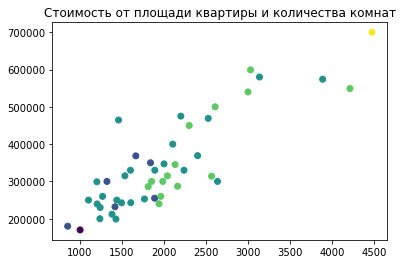

In [11]:
fig, ax = plt.subplots()

ax.scatter(data.square_house, data.cost,
           c = data.number_of_rooms )

ax.set_title('Стоимость от площади квартиры и количества комнат')

plt.show()

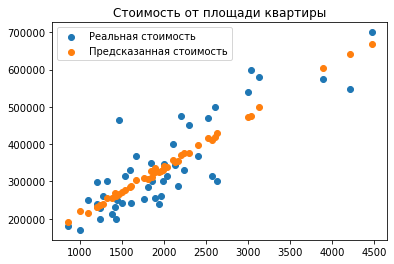

In [12]:
fig, ax = plt.subplots()

ax.scatter(data.square_house, data.cost,
           label = 'Реальная стоимость')

ax.scatter(data.square_house, y_pred,
           label = 'Предсказанная стоимость' )

ax.set_title('Стоимость от площади квартиры')

ax.legend()
plt.show()